###Импортирование необходимых библиотек

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Исследуем основные характеристики датасета

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/content/MMO/heart.csv")

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [ ]:
data['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

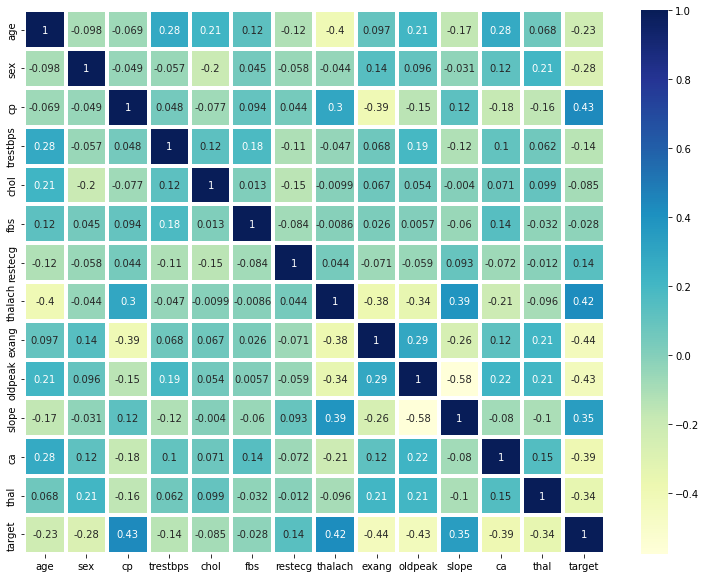

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "YlGnBu", annot=True, linewidth=3)

Из матрицы корреляции видно, что наиболее сильно коррелируют показатели Тип боли в груди и Молекулярно-таргетная терапия. Меньша корелляция наблюдается у показателей Максимальной ЧСС и Наклона пика нагрузки ST-сегмента.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]), <a list of 91 Text major ticklabel objects>)

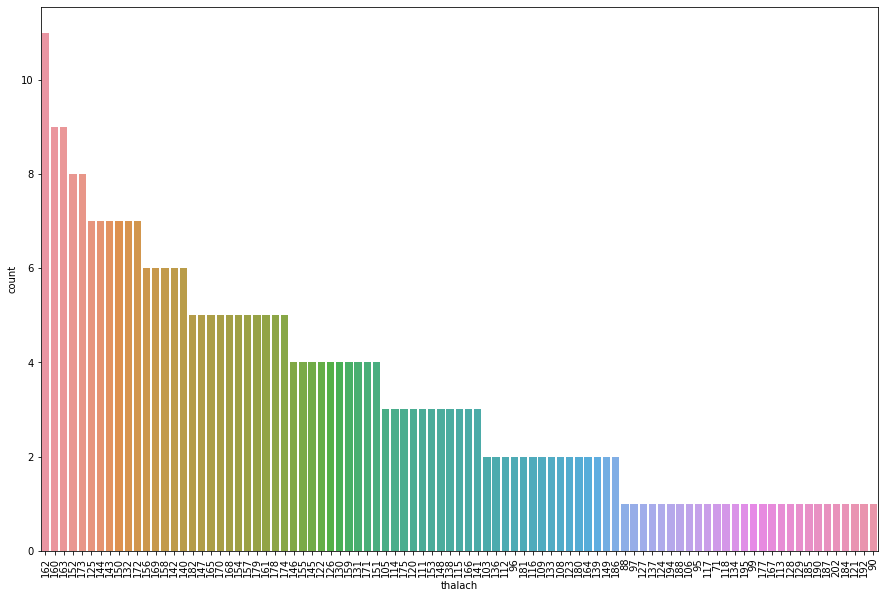

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="thalach", data=data, order = data['thalach'].value_counts().index)
plt.xticks(rotation=90)

Из гистограммы видно, что больше всего показателей Максимальной ЧСС находится в интервале от 160 до 163 уд/мин 

In [ ]:
# data_cp = data.groupby(by  = 'cp').mean()
# data_cp = data_cp.get(["age", "thalach", "slope"])
# data_cp
data_age = data.groupby(by  = 'age').mean()
data_age = data_age.get([ "thalach", "trestbps"])
data_age

,thalach,trestbps
age,,
29,202.000000,130.000000
34,183.000000,118.000000
35,160.500000,126.500000
37,178.500000,125.000000
38,176.000000,132.000000
39,163.250000,122.500000
40,157.666667,134.000000
41,164.700000,119.000000
42,160.250000,127.000000


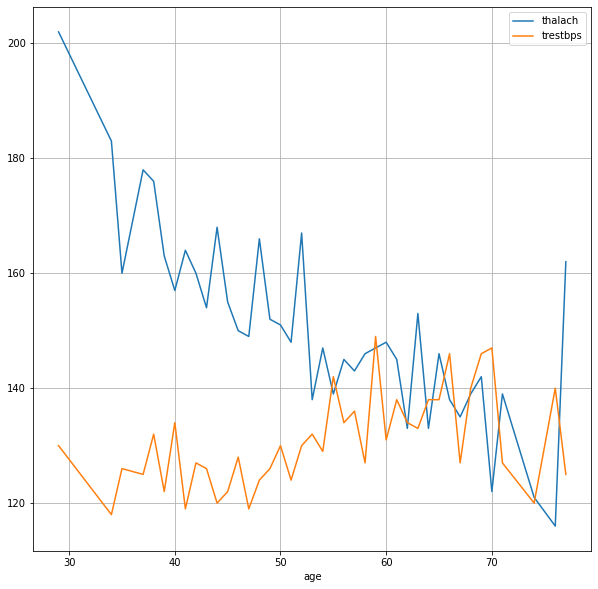

In [ ]:
data_by_year=data_age.apply(lambda x : x.astype("int"))
data_by_year.plot.line(figsize=(10,10), grid="on");
plt.ylabel("");

In [ ]:
data1 = data
data1.loc[data1.age>0, 'age'] = (data1.age // 10 ) * 10
data_age1 = data1.groupby(by  = 'age').mean()
data_age1 = data_age1.get([ "thalach", "trestbps"])
data_age1

,thalach,trestbps
age,,
20,202.000000,130.000000
30,169.733333,125.200000
40,159.291667,123.916667
50,148.024000,133.472000
60,141.475000,136.375000
70,130.500000,135.800000


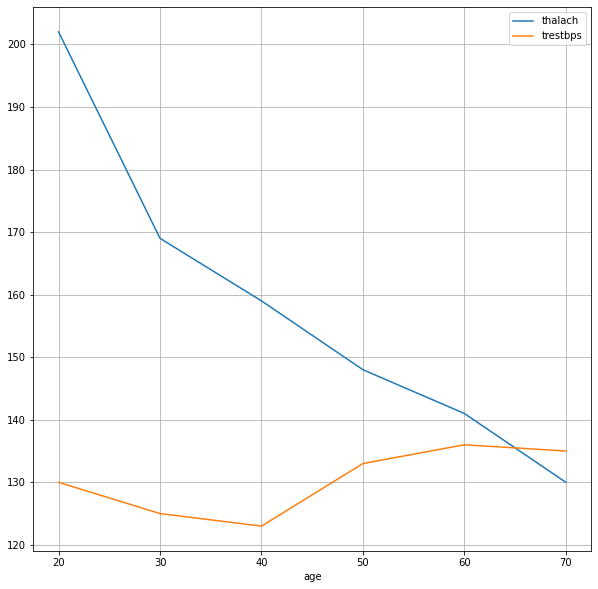

In [ ]:
data_by_year=data_age1.apply(lambda x : x.astype("int"))
data_by_year.plot.line(figsize=(10,10), grid="on");
plt.ylabel("");

Разбив показатели по по возрасту исследуемых, можно заметить, что наибольшие значения максимального пульса наблюдаются в юном возрасте. А значения давления достигают своего максимума в возрасте 60-65 лет.

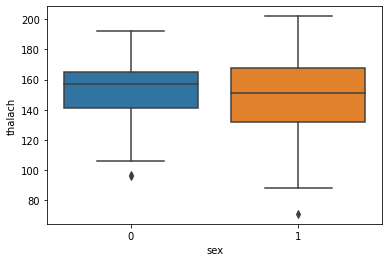

In [ ]:
sns.boxplot(data=data, x='sex', y='thalach')

Из диаграммы "Ящик с усами" видно, что медианное значение Максимальной ЧСС больше у женщин, а размах в значениях - у мужчин.

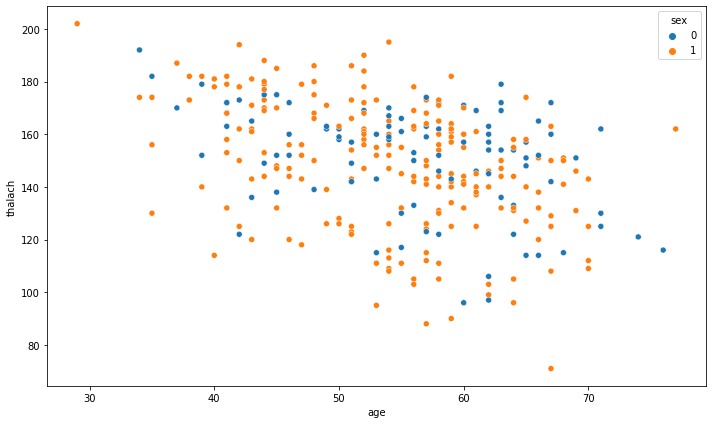

In [ ]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=data, x='age', y='thalach', hue='sex')
plt.show()

In [ ]:
labels = data_age1.index
sizes = data_age1['thalach']

([<matplotlib.patches.Wedge at 0x7f5ff21fe710>,
 [Text(-0.8640569070345949, -0.6807390552963812, '20'),
  Text(0.35067906780453995, -1.042604523011357, '30'),
  Text(1.086048014030603, -0.1746416651895629, '40'),
  Text(0.7212257150948063, 0.8305621396897318, '50'),
  Text(-0.2628284087277976, 1.0681391424180717, '60'),
  Text(-0.999361436452416, 0.4596484736532515, '70')],
 [Text(-0.47130376747341535, -0.37131221197984426, '21.2%'),
  Text(0.19127949152974905, -0.5686933761880127, '17.8%'),
  Text(0.5923898258348743, -0.09525909010339793, '16.7%'),
  Text(0.393395844597167, 0.45303389437621727, '15.6%'),
  Text(-0.14336095021516232, 0.5826213504098573, '14.9%'),
  Text(-0.5451062380649542, 0.2507173492654099, '13.7%')])

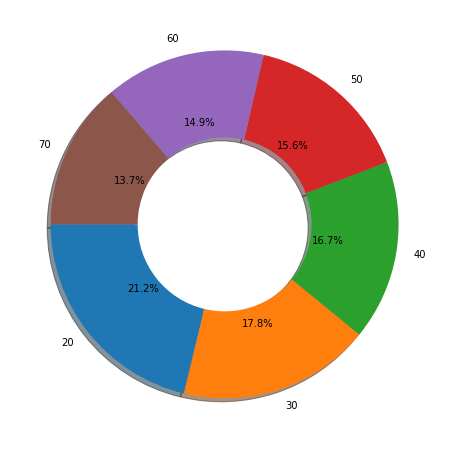

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.5), shadow=True, startangle=180)

Из кольцевой диаграммы также видно, что у 20-летних людей наблюдаются наибольшие значения максимального пульса.

На основании проведенного анализа можно сделать следующий вывод: 

*   Наиболее популярным жанром игр во всем мире является "Action";
*   Самую большую долю продаж в мире имеет Северная Америка;
*   В 2009 году произошел скачок продаж видеоигр по всему миру, кроме Японии.
